In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [10]:
es_v_true_e_reco = np.load('shion_data/shion_v_true_e_reco_es_normalized.npy')[0]
es_energy = np.load('shion_data/shion_v_true_e_reco_es_normalized.npy')[1]
weight = np.load('shion_data/shion_v_true_e_reco_es_normalized.npy')[2]
weightE = np.load('shion_data/shion_v_true_e_reco_es_normalized.npy')[3]

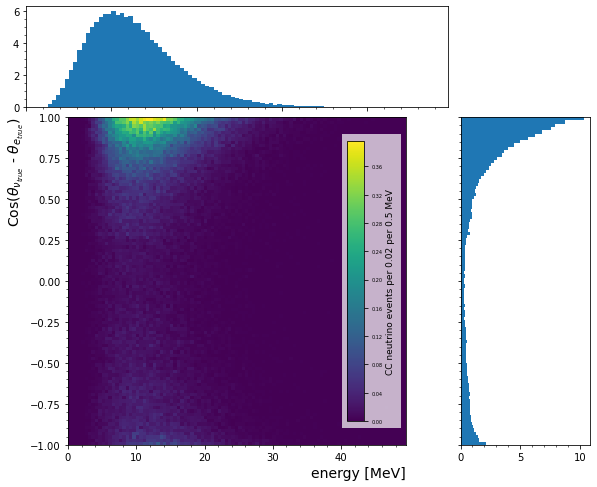

In [11]:
xData = es_energy
yData = es_v_true_e_reco
esNum = 145

#nuEnArr, thetaArr
nullfmt = NullFormatter()  # no labels
# definitions for the axes
left, width = 0.11, 0.65
bottom, height = 0.11, 0.65
bottom_h = left_h = left + width + 0.02

rect_hist2d = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
# rect_cbar = [left_h, bottom_h, 0.2, 0.2]
    
# start with a rectangular Figure
fig = plt.figure(1, figsize=(9, 7))
    
axHist2D = plt.axes(rect_hist2d)
axHist2D.set_aspect(24)
axHistX = plt.axes(rect_histx)
axHistY = plt.axes(rect_histy)
# axCBar = plt.axes(rect_cbar)
# axCBar.axis("off")
    
# no labels
axHistX.xaxis.set_major_formatter(nullfmt)
axHistY.yaxis.set_major_formatter(nullfmt)
    
energy_bins = np.arange(start=0, stop=50, step=0.5)
ang_bins = np.arange(start=-1.02, stop=1.02, step=0.02)

weight_en = np.full(shape=len(xData), fill_value = esNum/len(xData))
weight_ang = np.full(shape=len(yData), fill_value = esNum/len(yData))
weight_2d = np.full(shape=len(yData), fill_value = esNum/len(yData))
h, xedges, yedges, im = axHist2D.hist2d(xData, yData, bins=[energy_bins, ang_bins], weights = weight_2d)
im.set_rasterized(True)
axHist2D.set_ylim(bottom=-1, top=1)
    
# color bar
cbbox = inset_axes(axHist2D, "17.5%", "90%", loc=5)
[ cbbox.spines[k].set_visible(False) for k in cbbox.spines ]
cbbox.tick_params(axis="both", left=False, top=False, right=False,
                    bottom=False, labelleft=False, labeltop=False,
                    labelright=False, labelbottom=False)
cbbox.set_facecolor([1, 1, 1, 0.7])
cbax = inset_axes(cbbox, '30%', '95%', loc=6)
# cbax.axis("off")
cb = plt.colorbar(im, cax=cbax, orientation="vertical")
cb.set_label("CC neutrino events per 0.02 per 0.5 MeV", rotation=90, fontsize=9)
cb.ax.tick_params(labelsize=5)
    
tick_locator = ticker.MaxNLocator(integer=True)
cb.locator = tick_locator
cb.update_ticks()
    
# bins = np.arange(-lim, lim + binwidth, binwidth)
axHistX.hist(xData, bins=energy_bins, histtype="stepfilled", weights = weight_en)
axHistY.hist(yData, bins=ang_bins, histtype="stepfilled", orientation="horizontal", weights = weight_ang)
    
axHistX.set_xlim(axHist2D.get_xlim())
axHistY.set_ylim(axHist2D.get_ylim())
    
name = "time_vs_energy_proj"
    
axHist2D.tick_params(axis="both", which="major", labelsize=10)
axHistX.tick_params(axis="both", which="major", labelsize=10)
axHistY.tick_params(axis="both", which="major", labelsize=10)

axHist2D.set_xlabel("energy [MeV]", horizontalalignment="right", x=1.0, fontsize=14)
axHist2D.set_ylabel("Cos($\u03B8_{\u03BD_{true}}$ - $\u03B8_{e_{true}}$)", horizontalalignment="right", y=1.0, fontsize=14)
    
axHist2D.xaxis.set_minor_locator(AutoMinorLocator())
axHist2D.yaxis.set_minor_locator(AutoMinorLocator())
axHistX.xaxis.set_minor_locator(AutoMinorLocator())
axHistX.yaxis.set_minor_locator(AutoMinorLocator())
axHistY.xaxis.set_minor_locator(AutoMinorLocator())
axHistY.yaxis.set_minor_locator(AutoMinorLocator())

plt.show()